## Secrets Config

In [1]:
HUGGING_FACE_TOKEN = "..."

## Installation

In [2]:
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
!pip install datasets

  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/66/f8/38298237d18d4b6a8ee5dfe390e97bed5adb8e01ec6f9680c0ddf3066728/datasets-2.14.4-py3-none-any.whl.metadata
  Using cached datasets-2.14.4-py3-none-any.whl.metadata (19 kB)
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/13/c3/e942893f4864a424514c81640f114980cfd5aff7e7414d1e0255f4571111/xxhash-3.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached xxhash-3.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Obtaining dependency information for multiprocess from https://files.pythonhosted.org/packages/35/a8/36d8d7b3e46b377800d8dec47891cdf05842d1a2366909ae4a0c89fbc5e6/multiprocess-0.70.15-py310-none-any.whl.metadata
  Using cached multiprocess-0.70.15-py310-none-any.whl.metadata (7.2 kB)
  Obtaining dependency information for dill<0.3.8,>=0.3.0 from https://files.pythonhosted.org/packages/f

In [33]:
!pip install opencv-python-headless

  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/21/6d/abf701fa71ff22e3617ec9b46197f9ff5bba16dfefa7ee259b60216112eb/opencv_python_headless-4.8.0.76-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 23.7 MB/s eta 0:00:00:00:0100:01


In [4]:
# !git clone git clone https://github.com/huggingface/diffusers.git

In [ ]:
# !git config --global credential.helper store

## Login to Hugging Face

In [10]:
from huggingface_hub import notebook_login, login

login(
    token=HUGGING_FACE_TOKEN,
    add_to_git_credential=True,
    write_permission=True,
)

Token is valid (permission: write).
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /home/jupyter/.cache/huggingface/token
Login successful


## Download the Kaggle Dataset

In [18]:
# !mv kaggle.json .kaggle/kaggle.json

In [ ]:
# !mkdir -p data/h_and_m

# !cd data/h_and_m && kaggle competitions download -c h-and-m-personalized-fashion-recommendations
# !cd data/h_and_m &&  unzip h-and-m-personalized-fashion-recommendations.zip

## Imports

In [353]:
import cv2
from datasets import load_dataset
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import shutil

## Data Exploration

In [293]:
df = pd.read_csv("data/h_and_m/articles.csv")

def _write_image_file_path_if_exists(row):
    article_id = str(row['article_id'])
    image_file_path = f"data/h_and_m/images/0{article_id[:2]}/0{article_id}.jpg"

    if not os.path.exists(image_file_path):
        return None
    return image_file_path

df["image_path"] = df.apply(_write_image_file_path_if_exists, axis=1)
df = df.dropna(subset=["image_path"])

In [90]:
print(f"Num rows: {len(df)}")

Num rows: 105100


In [92]:
product_type_names = set(df["product_type_name"])
len(product_type_names)

131

In [93]:
product_type_names

{'Accessories set',
 'Alice band',
 'Baby Bib',
 'Backpack',
 'Bag',
 'Ballerinas',
 'Beanie',
 'Belt',
 'Bikini top',
 'Blanket',
 'Blazer',
 'Blouse',
 'Bodysuit',
 'Bootie',
 'Boots',
 'Bra',
 'Bra extender',
 'Bracelet',
 'Braces',
 'Bucket hat',
 'Bumbag',
 'Cap',
 'Cap/peaked',
 'Cardigan',
 'Chem. cosmetics',
 'Clothing mist',
 'Coat',
 'Costumes',
 'Cross-body bag',
 'Cushion',
 'Dog Wear',
 'Dog wear',
 'Dress',
 'Dungarees',
 'Earring',
 'Earrings',
 'Eyeglasses',
 'Felt hat',
 'Fine cosmetics',
 'Flat shoe',
 'Flat shoes',
 'Flip flop',
 'Garment Set',
 'Giftbox',
 'Gloves',
 'Hair clip',
 'Hair string',
 'Hair ties',
 'Hair/alice band',
 'Hairband',
 'Hat/beanie',
 'Hat/brim',
 'Headband',
 'Heeled sandals',
 'Heels',
 'Hoodie',
 'Jacket',
 'Jumpsuit/Playsuit',
 'Keychain',
 'Kids Underwear top',
 'Leg warmers',
 'Leggings/Tights',
 'Long John',
 'Marker pen',
 'Mobile case',
 'Moccasins',
 'Necklace',
 'Night gown',
 'Nipple covers',
 'Other accessories',
 'Other shoe',
 '

In [322]:
selected_product_type_name = "Top"

# selected_graphical_appearance_name = None
selected_graphical_appearance_name = "Solid"

# selected_index_group_name = None
selected_index_group_name = "Ladieswear"

# selected_index_name = None
selected_index_name = "Ladieswear"

# selected_colour_group_name = None
selected_colour_group_name = "Black"


selected_garment_group_name = "Jersey Basic"

# {'Contemporary Casual',
#  'Contemporary Smart',
#  'Contemporary Street',
#  'Men Edition',
#  'Men Project',
#  'Men Suits & Tailoring',
#  'Men Underwear'}

selected_section_name = None
# selected_section_name = "Contemporary Street"

detail_desc_key_words = [
    # "cropped top",
    # "crop top",
]


words_to_exclude_from_detail_desc = [
    "short sleeves",
    "button",
]



In [323]:
KEYWORDS_THAT_INDICATE_MULTIPLE_PRODUCTS_IN_PRODUCT_IMAGE = [
    "pack",
    "pk",
    "2-p",
]
    

product_rows = df[
    (df["product_type_name"] == selected_product_type_name) &
    (True if selected_graphical_appearance_name is None else df["graphical_appearance_name"] == selected_graphical_appearance_name) &
    (True if selected_index_group_name is None else df["index_group_name"] == selected_index_group_name) &
    (True if selected_index_name is None else df["index_name"] == selected_index_name) &    
    (True if selected_colour_group_name is None else df["colour_group_name"] == selected_colour_group_name) &
    (True if selected_garment_group_name is None else df["garment_group_name"] == selected_garment_group_name) &
    (True if selected_section_name is None else df["section_name"] == selected_section_name) &
    (df["detail_desc"].str.contains(
        "|".join(detail_desc_key_words),
        flags=re.IGNORECASE,
    )) &
    (~df["detail_desc"].str.contains(
        "|".join(words_to_exclude_from_detail_desc),
        flags=re.IGNORECASE,
    ).apply(lambda row: row is True)) &
    
    (~df["prod_name"].str.contains(
        "|".join(KEYWORDS_THAT_INDICATE_MULTIPLE_PRODUCTS_IN_PRODUCT_IMAGE),
        flags=re.IGNORECASE,
    ))
]

product_rows

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,image_path
1072,316441001,316441,Lee (1),254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Long-sleeved top in soft jersey.,data/h_and_m/images/031/0316441001.jpg
3572,458087001,458087,Fia longsleeve (1),254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,"Top in soft, airy viscose jersey with long sle...",data/h_and_m/images/045/0458087001.jpg
14062,561343001,561343,Sigita,254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted off-the-shoulder top in cotton jersey w...,data/h_and_m/images/056/0561343001.jpg
14573,563519008,563519,Simba rib,254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,"Fitted, polo-neck top in soft viscose jersey.",data/h_and_m/images/056/0563519008.jpg
17617,575141004,575141,Hathaway,254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Long-sleeved jersey top.,data/h_and_m/images/057/0575141004.jpg
24955,611024001,611024,Frugan.,254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in soft jersey with a slightly lowe...,data/h_and_m/images/061/0611024001.jpg
46086,685347001,685347,Duo,254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in soft cotton jersey with a boat n...,data/h_and_m/images/068/0685347001.jpg
57510,717066005,717066,Fia longsleeve,254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Long-sleeved top in airy Tencel™ lyocell jerse...,data/h_and_m/images/071/0717066005.jpg
72481,767813001,767813,Garbo longsleeve,254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Top in airy viscose jersey with a V-neck and l...,data/h_and_m/images/076/0767813001.jpg
72515,767925004,767925,Duo,254,Top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in cotton jersey with a boat neck a...,data/h_and_m/images/076/0767925004.jpg


article_id                                                   316441001
product_code                                                    316441
prod_name                                                      Lee (1)
product_type_no                                                    254
product_type_name                                                  Top
product_group_name                                  Garment Upper body
graphical_appearance_no                                        1010016
graphical_appearance_name                                        Solid
colour_group_code                                                    9
colour_group_name                                                Black
perceived_colour_value_id                                            4
perceived_colour_value_name                                       Dark
perceived_colour_master_id                                           5
perceived_colour_master_name                                     Black
depart

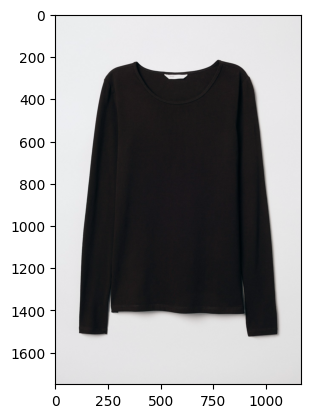

article_id                                                              458087001
product_code                                                               458087
prod_name                                                      Fia longsleeve (1)
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

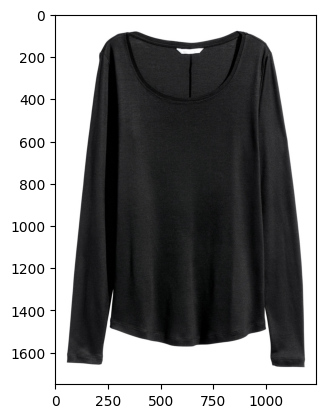

article_id                                                              561343001
product_code                                                               561343
prod_name                                                                  Sigita
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

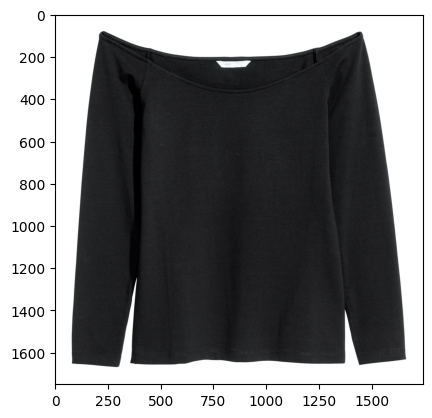

article_id                                                          563519008
product_code                                                           563519
prod_name                                                           Simba rib
product_type_no                                                           254
product_type_name                                                         Top
product_group_name                                         Garment Upper body
graphical_appearance_no                                               1010016
graphical_appearance_name                                               Solid
colour_group_code                                                           9
colour_group_name                                                       Black
perceived_colour_value_id                                                   4
perceived_colour_value_name                                              Dark
perceived_colour_master_id                                      

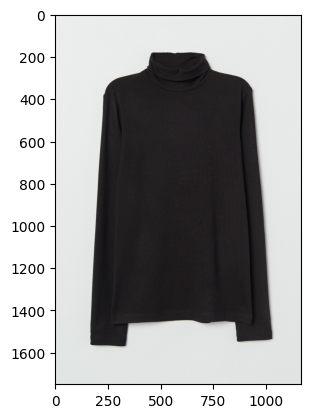

article_id                                                   575141004
product_code                                                    575141
prod_name                                                     Hathaway
product_type_no                                                    254
product_type_name                                                  Top
product_group_name                                  Garment Upper body
graphical_appearance_no                                        1010016
graphical_appearance_name                                        Solid
colour_group_code                                                    9
colour_group_name                                                Black
perceived_colour_value_id                                            4
perceived_colour_value_name                                       Dark
perceived_colour_master_id                                           5
perceived_colour_master_name                                     Black
depart

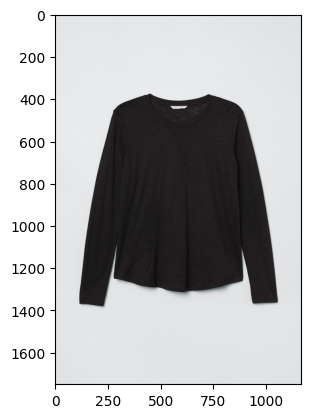

article_id                                                              611024001
product_code                                                               611024
prod_name                                                                 Frugan.
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

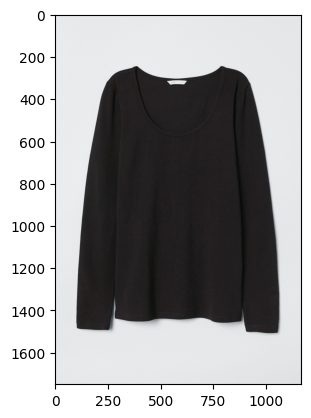

article_id                                                              685347001
product_code                                                               685347
prod_name                                                                     Duo
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

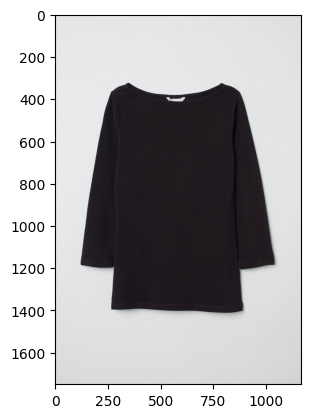

article_id                                                              717066005
product_code                                                               717066
prod_name                                                          Fia longsleeve
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

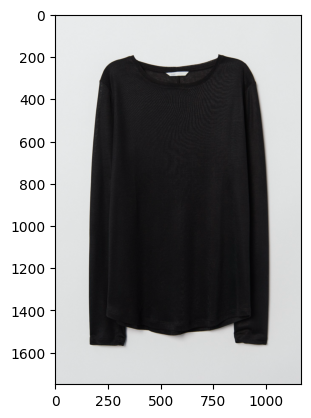

article_id                                                              767813001
product_code                                                               767813
prod_name                                                        Garbo longsleeve
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

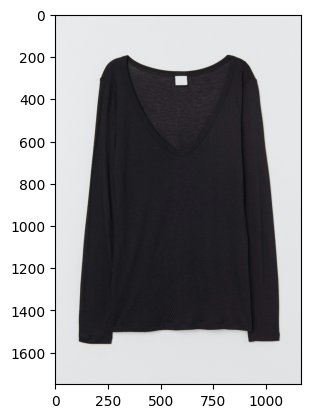

article_id                                                              767925004
product_code                                                               767925
prod_name                                                                     Duo
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

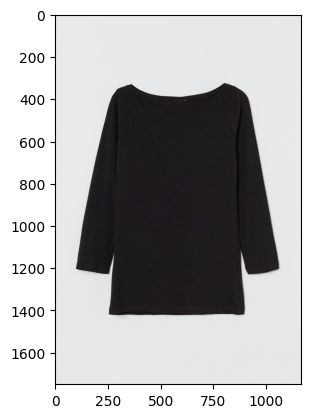

article_id                                                              768931002
product_code                                                               768931
prod_name                                                          Lee longsleeve
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

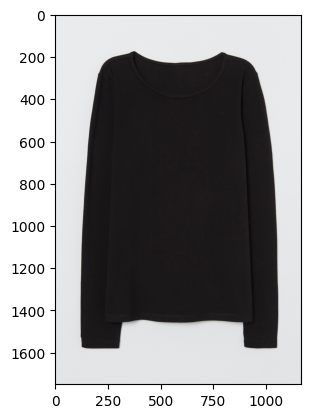

article_id                                                              784926001
product_code                                                               784926
prod_name                                                                 Lee rib
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

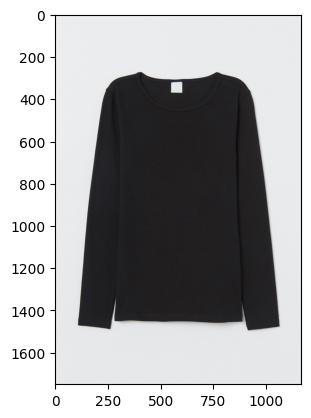

article_id                                                              785018003
product_code                                                               785018
prod_name                                                               Shenzi LP
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

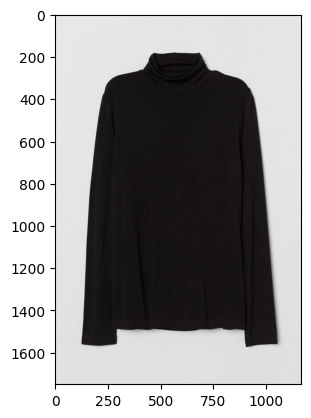

article_id                                                              808305003
product_code                                                               808305
prod_name                                                                Angelica
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

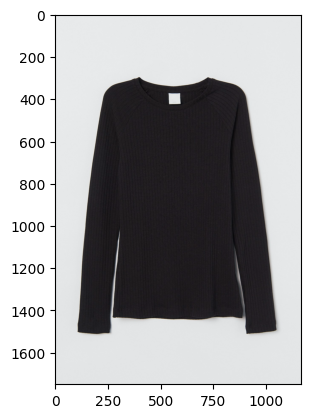

article_id                                                              827428001
product_code                                                               827428
prod_name                                                       Porto long sleeve
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

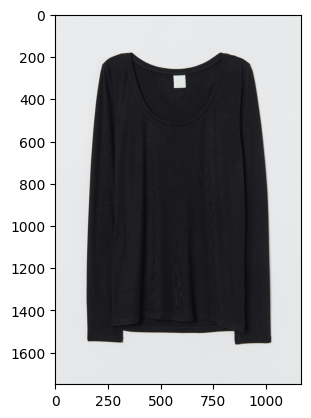

article_id                                                              828050002
product_code                                                               828050
prod_name                                                       Brody long sleeve
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

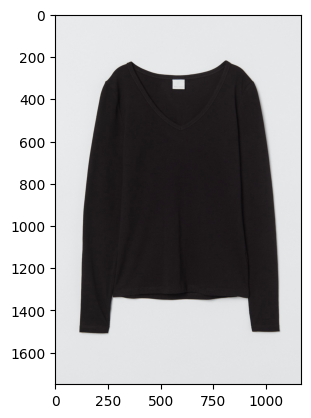

article_id                                                              898918002
product_code                                                               898918
prod_name                                                             Shanghai CN
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

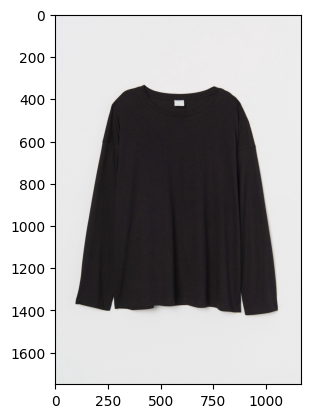

article_id                                                              917843001
product_code                                                               917843
prod_name                                               Linnea V-neck long sleeve
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

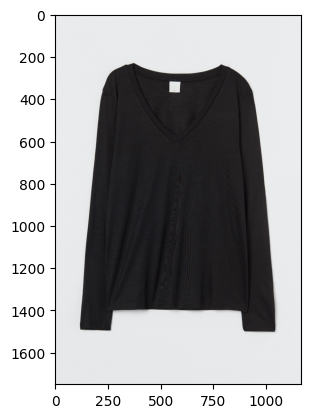

article_id                                                              928461001
product_code                                                               928461
prod_name                                                            Nancy rib LS
product_type_no                                                               254
product_type_name                                                             Top
product_group_name                                             Garment Upper body
graphical_appearance_no                                                   1010016
graphical_appearance_name                                                   Solid
colour_group_code                                                               9
colour_group_name                                                           Black
perceived_colour_value_id                                                       4
perceived_colour_value_name                                                  Dark
perceived_colour

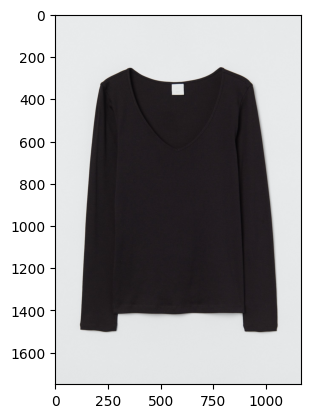

In [324]:
for _, row in product_rows.iterrows():
    print(row)
    print(row["detail_desc"])
    image = cv2.imread(row["image_path"])
    plt.imshow(image)
    plt.show()    

## Generate Training Dataset

In [351]:
product_name = "womens_jersey_black"
product_summary = "black long sleeve jersey"

hugging_face_dataset_name = "trajanson/black-long-sleeve-jersey"

In [333]:
product_image_directory = os.path.join(
    "data",
    "products",
    product_name,
)

In [334]:
os.makedirs(product_image_directory)

In [350]:
metadata_file_path = os.path.join(
    product_image_directory,
    "metadata.jsonl",
)

for _, row in product_rows.iterrows():
    product_image_name = os.path.split(row["image_path"])[-1]
        
    shutil.copyfile(
        src=row["image_path"],
        dst=os.path.join(product_image_directory, product_image_name),
    )
    
    
    
    caption = product_summary + ". "
    caption += row["detail_desc"]
    caption += f" Its color is {row['colour_group_name'].lower()}."
    caption = "".join([
        char for char in caption
        if char not in [
            "\u2122"
        ]
    ])
    
    annotation = {
        "file_name": product_image_name,
        "text": caption,
    }
    
    line = json.dumps(annotation)
    
    with open(metadata_file_path, 'a') as file_handler:
        file_handler.write(f"{line}\n")

## Publish Dataset

In [354]:


dataset = load_dataset(
    "imagefolder",
    data_dir=product_image_directory,
  )


dataset.push_to_hub(hugging_face_dataset_name)


Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/19 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]